
https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html

/home/jlandercy/.local/lib/python3.6/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/home/jlandercy/.local/lib/python3.6/site-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 
DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


0.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.458 --> 0.458 --> 
Init 2
0.826 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.525 --> 0.477 --> 0.472 --> 0.472 --> 


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


Soft-DTW k-means
0.472 --> 0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


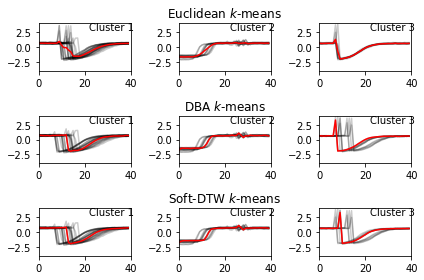

In [1]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [3]:
dir(sdtw_km)

['_X_fit',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign',
 '_byte2string',
 '_check_n_features',
 '_estimator_type',
 '_fit_one_init',
 '_get_metric_params',
 '_get_model_params',
 '_get_param_names',
 '_get_tags',
 '_is_fitted',
 '_iter',
 '_listify',
 '_more_tags',
 '_none_to_str',
 '_organize_model',
 '_post_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_squared_inertia',
 '_to_dict',
 '_transform',
 '_update_centroids',
 '_validate_data',
 'cluster_centers_',
 'dtw_inertia',
 'fit',
 'fit_predict',
 'fit_transform',
 'from_hdf5',
 'from_json',
 'from_pickle',
 'get_params',
 'inert

In [6]:
sdtw_km.labels_

array([0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2])

In [7]:
sdtw_km.cluster_centers_

array([[[ 0.68341657],
        [ 0.68031509],
        [ 0.6727196 ],
        [ 0.668103  ],
        [ 0.66849313],
        [ 0.67314273],
        [ 0.68061588],
        [ 0.68975896],
        [ 0.69994977],
        [ 0.71108331],
        [ 0.72309839],
        [ 0.7372553 ],
        [ 0.80841223],
        [-1.77698127],
        [-1.95639439],
        [-1.8575395 ],
        [-1.78520399],
        [-1.69150575],
        [-1.59433471],
        [-1.46593908],
        [-1.27180254],
        [-1.06871627],
        [-0.82125644],
        [-0.57443971],
        [-0.31574434],
        [-0.07581652],
        [ 0.08897093],
        [ 0.23478148],
        [ 0.34523602],
        [ 0.41961051],
        [ 0.4727409 ],
        [ 0.51571474],
        [ 0.54841767],
        [ 0.57514216],
        [ 0.59991634],
        [ 0.62404789],
        [ 0.64403616],
        [ 0.65990495],
        [ 0.67768476],
        [ 0.69904478]],

       [[-1.76347745],
        [-1.54133008],
        [-1.46130854],
        [